###  TUGAS PRAKTIKUM 1

In [40]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential, layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv(r"D:\UMM\KULIAH\KULIAH smstr 7\Pembelajaran Mesin\Praktikum\Modul 4\Dataset\Demo.csv")

In [41]:
df = pd.read_csv(r"D:\UMM\KULIAH\KULIAH smstr 7\Pembelajaran Mesin\Praktikum\Modul 4\Dataset\Demo.csv")
print("Dataset shape:", df.shape)


df = df.dropna(subset=['reviewDescription']).reset_index(drop=True)
df['reviewDescription'] = df['reviewDescription'].astype(str)
texts = df['reviewDescription'].astype(str).tolist()
labels = (df['ratingScore'] > 3).astype(int).tolist()  # positif (rating > 3), negatif (<=3)


Dataset shape: (3062, 11)


In [42]:
# Jangan Ubah Kode Dibawah Ini
vocab_size = 5000
maxlen = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=maxlen)

In [43]:
# Jangan Ubah Kode Dibawah Ini
split = int(0.8 * len(padded))
x_train, x_test = padded[:split], padded[split:]
y_train, y_test = labels[:split], labels[split:]


y_train = np.array(y_train)
y_test = np.array(y_test)

print("Train size:", len(x_train), "| Test size:", len(x_test))
print("x_train shape:", x_train.shape, "| y_train shape:", y_train.shape)

Train size: 2380 | Test size: 596
x_train shape: (2380, 100) | y_train shape: (2380,)


In [44]:
# Jangan Ubah Kode Dibawah Ini
model = Sequential([
    layers.Embedding(vocab_size, 16),
    layers.LSTM(128),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [45]:
# Jangan Ubah Kode Dibawah Ini
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=16,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.6945 - loss: 0.6466 - val_accuracy: 0.5570 - val_loss: 0.6986
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.6983 - loss: 0.6152 - val_accuracy: 0.5570 - val_loss: 0.7210
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.6983 - loss: 0.6119 - val_accuracy: 0.5570 - val_loss: 0.7269
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6983 - loss: 0.6112 - val_accuracy: 0.5570 - val_loss: 0.7312
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.6983 - loss: 0.6105 - val_accuracy: 0.5570 - val_loss: 0.7328
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.6983 - loss: 0.6100 - val_accuracy: 0.5570 - val_loss: 0.7299
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.6983 - loss: 0.6090 - val_accuracy: 0.5570 - val_loss: 0.7339
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.6983 - loss: 0.6082 - val_accu


Test Accuracy: 0.5570


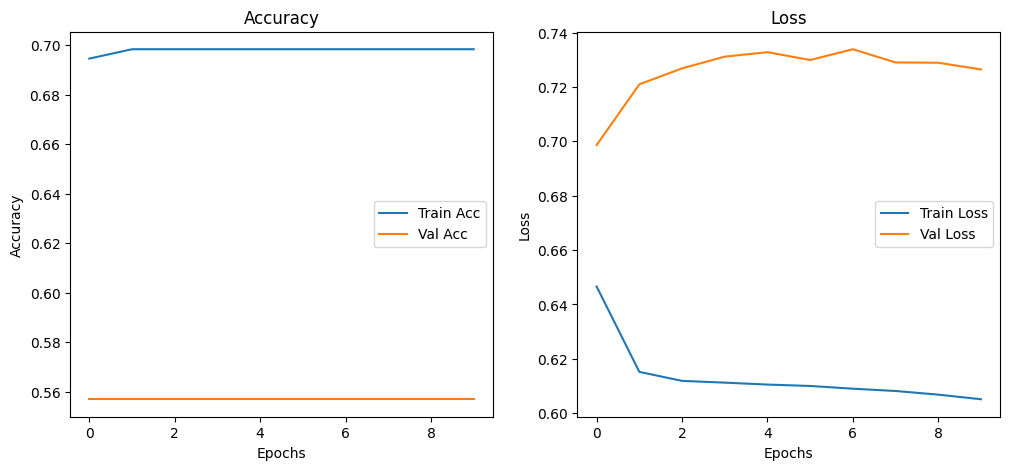

In [46]:
# Jangan Ubah Kode Dibawah Ini
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {acc:.4f}")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

### Perbaikan Model 2

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   productAsin        2976 non-null   object
 1   country            2976 non-null   object
 2   date               2976 non-null   object
 3   isVerified         2976 non-null   bool  
 4   ratingScore        2976 non-null   int64 
 5   reviewTitle        2976 non-null   object
 6   reviewDescription  2976 non-null   object
 7   reviewUrl          2960 non-null   object
 8   reviewedIn         2976 non-null   object
 9   variant            2976 non-null   object
 10  variantAsin        2976 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 235.5+ KB


In [74]:
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Hitung class weight (karena data imbalance)
class_weight = {0: 1.8, 1: 1.0}

# ============================
#  MODEL FINAL OPTIMAL
# ============================
model_final = models.Sequential([
    layers.Embedding(vocab_size, 32, input_length=maxlen),

    # Dropout dalam embedding sangat efektif untuk teks
    layers.SpatialDropout1D(0.3),

    # Bidirectional LSTM (lebih kuat daripada LSTM biasa)
    layers.Bidirectional(layers.LSTM(
        64,
        dropout=0.4,
        recurrent_dropout=0.3
    )),

    # Dense dengan L2 agar bobot tidak terlalu besar
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.5),

    # Output layer
    layers.Dense(1, activation='sigmoid')
])

# Compile dengan optimizer terbaik (Adam)
model_final.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [75]:
es = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


In [76]:
history = model_final.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),
    class_weight=class_weight,
    callbacks=[es],
    verbose=1
)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.6861 - loss: 0.8359 - val_accuracy: 0.6812 - val_loss: 0.6422
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.7613 - loss: 0.6886 - val_accuracy: 0.7668 - val_loss: 0.5031
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.8416 - loss: 0.5244 - val_accuracy: 0.8003 - val_loss: 0.4336
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 0.8714 - loss: 0.4459 - val_accuracy: 0.8372 - val_loss: 0.3982
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.9101 - loss: 0.3630 - val_accuracy: 0.8591 - val_loss: 0.3543
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.9256 - loss: 0.2888 - val_accuracy: 0.8591 - val_loss: 0.3955
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9319 - loss: 0.2739 - val_accuracy: 0.8440 - val_loss: 0.4056
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.9454 - loss: 0.2290 - val_accuracy: 0.8708 

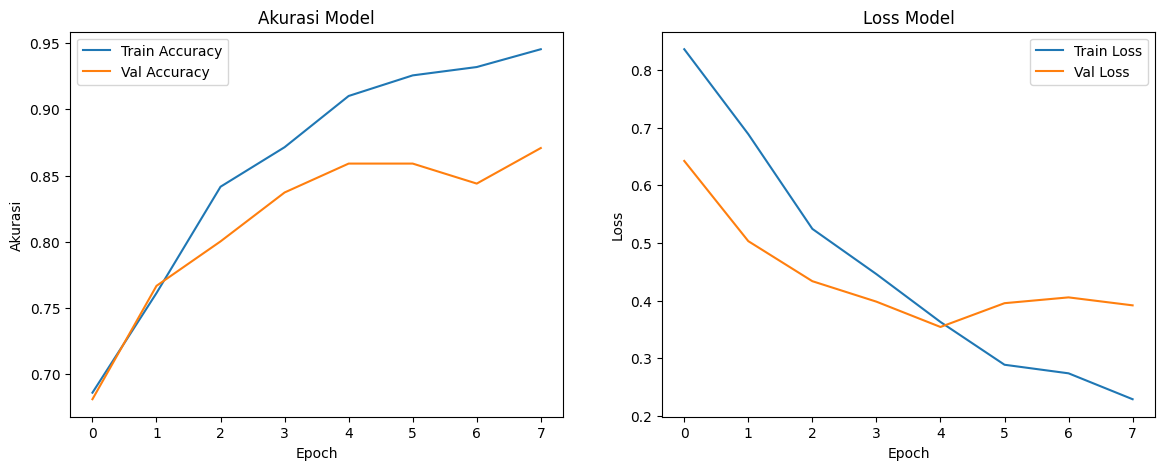

In [77]:
# Plot Accuracy & Loss
plt.figure(figsize=(14,5))

# ===== Accuracy =====
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# ===== Loss =====
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [78]:
from sklearn.metrics import classification_report

# Prediksi kelas (threshold 0.5)
y_pred_prob = model_final.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\n=== Classification Report ===\n")
print(classification_report(y_test, y_pred, target_names=['Negatif', 'Positif']))

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step

=== Classification Report ===

              precision    recall  f1-score   support

     Negatif       0.90      0.77      0.83       264
     Positif       0.84      0.93      0.88       332

    accuracy                           0.86       596
   macro avg       0.87      0.85      0.85       596
weighted avg       0.86      0.86      0.86       596



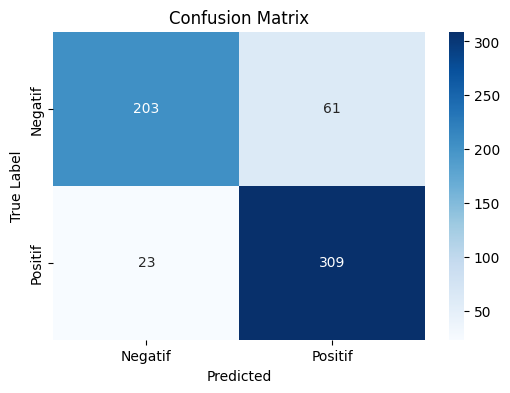

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Positif'],
            yticklabels=['Negatif', 'Positif'])
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [80]:
def prediksi_sentimen(teks):
    # 1. Pastikan teks dalam bentuk list
    teks_input = [str(teks)]
    
    # 2. Tokenisasi teks
    seq = tokenizer.texts_to_sequences(teks_input)
    
    # 3. Padding seperti saat training
    padded_seq = pad_sequences(seq, maxlen=maxlen)
    
    # 4. Prediksi dengan model final
    prob = model_final.predict(padded_seq)[0][0]
    
    # 5. Tentukan label
    if prob > 0.5:
        label = "Positif"
    else:
        label = "Negatif"
    
    return label, float(prob)


In [84]:
teks = "i like this product"
label, prob = prediksi_sentimen(teks)

print("Teks :", teks)
print("Prediksi Sentimen :", label)
print("Probabilitas :", prob)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Teks : i like this product
Prediksi Sentimen : Positif
Probabilitas : 0.60767662525177


###  Perbaikan model


In [ ]:
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

class_weight = {
    0: 1.5,   # kelas Negatif (lebih sedikit → beri bobot lebih besar)
    1: 1.0
}

model_new = models.Sequential([
    layers.Embedding(vocab_size, 64, input_length=maxlen),

    # Spatial dropout sangat efektif untuk teks
    layers.SpatialDropout1D(0.4),

    # Bidirectional LSTM
    layers.Bidirectional(layers.LSTM(
        64,
        dropout=0.4,
        recurrent_dropout=0.3,
        kernel_regularizer=regularizers.l2(1e-4)
    )),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(1, activation='sigmoid')
])

model_new.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
es = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:

history = model_new.fit(
    x_train, y_train,
    epochs=12,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[es],
    class_weight=class_weight,   # ← gunakan class weight
    verbose=1
)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = (model_new.predict(x_test) > 0.5).astype("int32")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Negatif", "Positif"]))

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.96      0.67      0.79       264
     Positif       0.79      0.98      0.87       332

    accuracy                           0.84       596
   macro avg       0.87      0.83      0.83       596
weighted avg       0.86      0.84      0.84       596



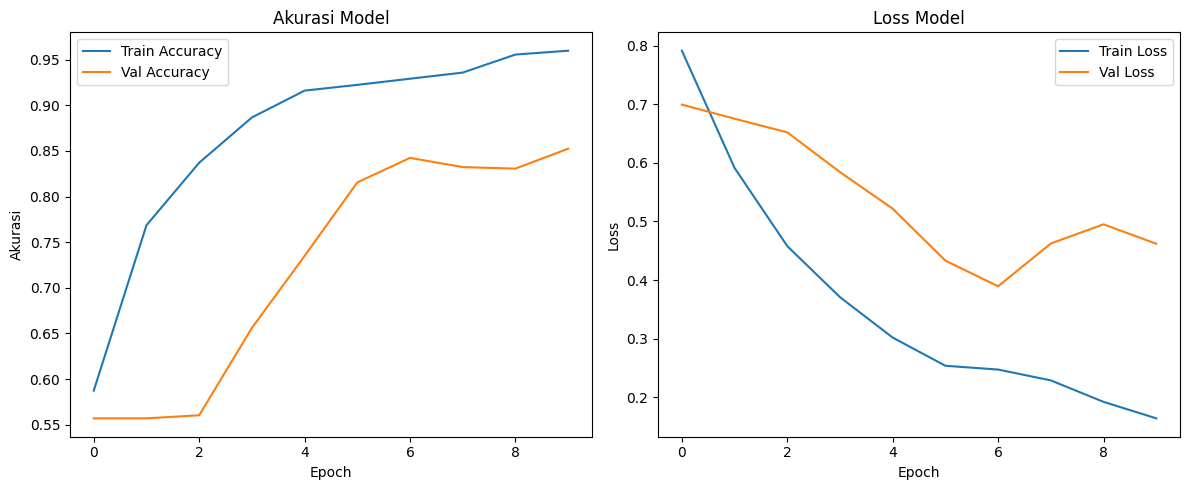

In [72]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Akurasi Model")
plt.xlabel("Epoch")
plt.ylabel("Akurasi")
plt.legend(["Train Accuracy", "Val Accuracy"])

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train Loss", "Val Loss"])

plt.tight_layout()
plt.show()


### Perbaikan model 1

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Hitung class weight untuk imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0,1]),
    y=np.array(labels)
)
class_weights = {0: class_weights[0], 1: class_weights[1]}
print("Class Weight:", class_weights)

# Model baru yang lebih baik
model_new = models.Sequential([
    layers.Embedding(vocab_size, 64, input_length=maxlen),

    # Dropout khusus embedding
    layers.SpatialDropout1D(0.3),

    # LSTM dua arah
    layers.Bidirectional(
        layers.LSTM(64, dropout=0.3, recurrent_dropout=0.3)
    ),

    # Dense untuk memperkuat representasi
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),

    # Output layer
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_new.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Early Stopping
es = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
# Train
history = model_new.fit(
    x_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(x_test, y_test),
    class_weight=class_weights,   # <--- penting!
    callbacks=[es],
    verbose=1
)

In [62]:
test_loss, test_acc = model_new.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.8574
Test Loss: 0.3782


In [63]:
y_pred_prob = model_new.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


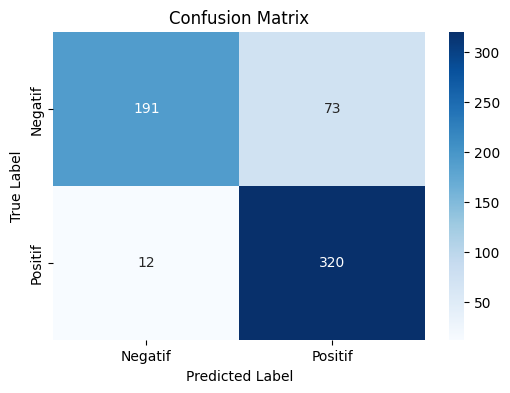

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negatif", "Positif"],
            yticklabels=["Negatif", "Positif"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


Classification Report:
              precision    recall  f1-score   support

     Negatif       0.94      0.72      0.82       264
     Positif       0.81      0.96      0.88       332

    accuracy                           0.86       596
   macro avg       0.88      0.84      0.85       596
weighted avg       0.87      0.86      0.85       596



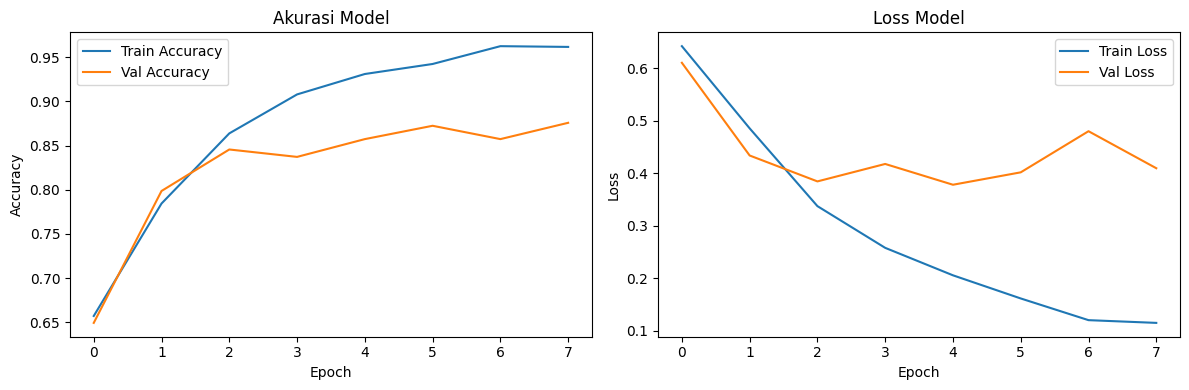

In [67]:
# ======================
# 4. Classification Report
# ======================
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negatif", "Positif"]))

# ======================
# 5. Plot Akurasi & Loss
# ======================
plt.figure(figsize=(12,4))

# --- Plot Accuracy ---
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Akurasi Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# --- Plot Loss ---
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

{np.int64(0): np.int64(982), np.int64(1): np.int64(1994)}


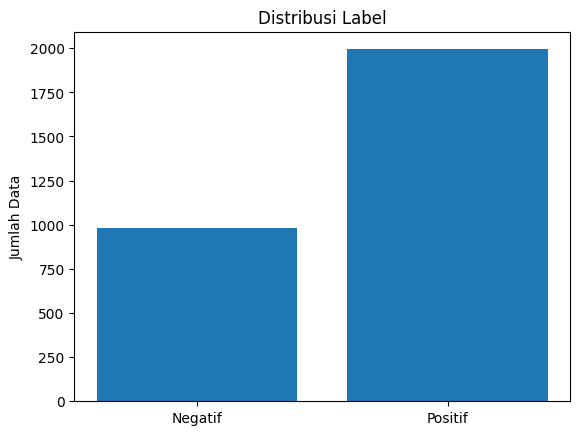

In [58]:
import matplotlib.pyplot as plt

unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

plt.bar(unique, counts)
plt.xticks([0,1], ['Negatif','Positif'])
plt.title("Distribusi Label")
plt.ylabel("Jumlah Data")
plt.show()
